### Pytorch 1.3.1
### cuda 10.1
### Dataset = Sleep-edf-2013
### pip install pyEDFlib : python에서 edf 파일을 열기 위한 라이브러리
### pip install matplotlib 

In [242]:
import numpy as np
from pyedflib import highlevel
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import shutil

### 함수 search_annotations_edf 
#### 해당 함수는 Hypnogram.edf이라는 이름을 가진 파일만 추려내기 위한 함수이며 해당 파일들은 annotations ( sleep stage ) 정보를 저장하고 있는 파일이다.

### 함수 search_signals_edf 
#### 해당 함수는 PSG.edf이라는 이름을 가진 파일만 추려내기 위한 함수이며 해당 파일들은 signals 정보를 저장하고 있는 파일이다.

In [186]:
def search_annotations_edf(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith("Hypnogram.edf")]
    return filenames

def search_signals_edf(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith("PSG.edf")]
    return filenames

def search_correct_annotations(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("Hypnogram.edf")]
    
    return filename

def search_signals_npy(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith(".npy")]
    return filenames

def search_correct_annotations_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

def search_correct_signals_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

In [27]:
path = 'D:/dataset/data_2013/' # sleep-edf 2013 데이터를 가지고 있는 폴더 명
annotations_edf_list = search_annotations_edf(path)
signals_edf_list = search_signals_edf(path)

print('signals edf file list')
print(signals_edf_list)

print('annotations edf file list')
print(annotations_edf_list)

signals edf file list
['SC4001E0-PSG.edf', 'SC4002E0-PSG.edf', 'SC4011E0-PSG.edf', 'SC4012E0-PSG.edf', 'SC4021E0-PSG.edf', 'SC4022E0-PSG.edf', 'SC4031E0-PSG.edf', 'SC4032E0-PSG.edf', 'SC4041E0-PSG.edf', 'SC4042E0-PSG.edf', 'SC4051E0-PSG.edf', 'SC4052E0-PSG.edf', 'SC4061E0-PSG.edf', 'SC4062E0-PSG.edf', 'SC4071E0-PSG.edf', 'SC4072E0-PSG.edf', 'SC4081E0-PSG.edf', 'SC4082E0-PSG.edf', 'SC4091E0-PSG.edf', 'SC4092E0-PSG.edf', 'SC4101E0-PSG.edf', 'SC4102E0-PSG.edf', 'SC4111E0-PSG.edf', 'SC4112E0-PSG.edf', 'SC4121E0-PSG.edf', 'SC4122E0-PSG.edf', 'SC4131E0-PSG.edf', 'SC4141E0-PSG.edf', 'SC4142E0-PSG.edf', 'SC4151E0-PSG.edf', 'SC4152E0-PSG.edf', 'SC4161E0-PSG.edf', 'SC4171E0-PSG.edf', 'SC4172E0-PSG.edf', 'SC4181E0-PSG.edf', 'SC4182E0-PSG.edf', 'SC4191E0-PSG.edf', 'SC4192E0-PSG.edf']
annotations edf file list
['SC4001EC-Hypnogram.edf', 'SC4002EC-Hypnogram.edf', 'SC4011EH-Hypnogram.edf', 'SC4012EC-Hypnogram.edf', 'SC4021EH-Hypnogram.edf', 'SC4022EJ-Hypnogram.edf', 'SC4031EC-Hypnogram.edf', 'SC4032E

#### signals_edf_list[0].split('-')[0][:-2]
#### signals 와 같은 annotations 파일을 찾기 위함


In [24]:
for filename in signals_edf_list:
    print('signals file name : %s , annotations file name : %s'%(filename,search_correct_annotations(signal_path,filename)[0]))

signals file name : SC4001E0-PSG.edf , annotations file name : SC4001EC-Hypnogram.edf
signals file name : SC4002E0-PSG.edf , annotations file name : SC4002EC-Hypnogram.edf
signals file name : SC4011E0-PSG.edf , annotations file name : SC4011EH-Hypnogram.edf
signals file name : SC4012E0-PSG.edf , annotations file name : SC4012EC-Hypnogram.edf
signals file name : SC4021E0-PSG.edf , annotations file name : SC4021EH-Hypnogram.edf
signals file name : SC4022E0-PSG.edf , annotations file name : SC4022EJ-Hypnogram.edf
signals file name : SC4031E0-PSG.edf , annotations file name : SC4031EC-Hypnogram.edf
signals file name : SC4032E0-PSG.edf , annotations file name : SC4032EP-Hypnogram.edf
signals file name : SC4041E0-PSG.edf , annotations file name : SC4041EC-Hypnogram.edf
signals file name : SC4042E0-PSG.edf , annotations file name : SC4042EC-Hypnogram.edf
signals file name : SC4051E0-PSG.edf , annotations file name : SC4051EC-Hypnogram.edf
signals file name : SC4052E0-PSG.edf , annotations fil

In [90]:
epoch_size = 30
sample_rate = 100
save_signals_path = path + 'origin_npy/'
save_annotations_path = save_signals_path+'annotations/'

os.makedirs(save_annotations_path,exist_ok=True)
os.makedirs(save_signals_path,exist_ok=True)

for filename in signals_edf_list:
    signals_filename = filename
    annotations_filename = search_correct_annotations(signal_path,filename)[0]
    
    signals_filename = path + signals_filename
    annotations_filename = path + annotations_filename
    
    _, _, annotations_header = highlevel.read_edf(annotations_filename)
    
    label = []
    for ann in annotations_header['annotations']:
        start = ann[0]

        length = ann[1]
        length = int(str(length)[2:-1]) // epoch_size # label은 30초 간격으로 사용할 것이기 때문에 30으로 나눈 값이 해당 sleep stage가 반복된 횟수이다.
        
        if ann[2] == 'Sleep stage W':
            for time in range(length):
                label.append(0)
        elif ann[2] == 'Sleep stage 1':
            for time in range(length):
                label.append(1)
        elif ann[2] == 'Sleep stage 2':
            for time in range(length):
                label.append(2)
        elif ann[2] == 'Sleep stage 3':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage 4':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage R':
            for time in range(length):
                label.append(4)
        else:
            for time in range(length):
                label.append(5)
    label = np.array(label)
    signals, _, signals_header = highlevel.read_edf(signals_filename)
    
    
    signals_len = len(signals[0]) // sample_rate // epoch_size
    annotations_len = len(label)
    if signals_header['startdate'] == annotations_header['startdate']:
        print("%s file's signal & annotations start time is same"%signals_filename.split('/')[-1])
        
        if signals_len > annotations_len :
            signals = signals[:3][:annotations_len]
        elif signals_len < annotations_len :
            signals = signals[:3]
            label = label[:signals_len]
        else:
            signals = signals[:3]
        signals = np.array(signals)
        
        np.save(save_signals_path + signals_filename.split('/')[-1].split('.')[0],signals)
        np.save(save_annotations_path + annotations_filename.split('/')[-1].split('.')[0],label)
        
        if (len(signals[0])//sample_rate//epoch_size != len(label)):
            print('signals len : %d / annotations len : %d'%(len(signals[0])//sample_rate//epoch_size,len(label)))
        
    else:
        print("%s file''s signal & annotations start time is different"%signals_filename.split('/')[-1])
        

SC4001E0-PSG.edf file's signal & annotations start time is same
SC4002E0-PSG.edf file's signal & annotations start time is same
SC4011E0-PSG.edf file's signal & annotations start time is same
SC4012E0-PSG.edf file's signal & annotations start time is same
SC4021E0-PSG.edf file's signal & annotations start time is same
SC4022E0-PSG.edf file's signal & annotations start time is same
SC4031E0-PSG.edf file's signal & annotations start time is same
SC4032E0-PSG.edf file's signal & annotations start time is same
SC4041E0-PSG.edf file's signal & annotations start time is same
SC4042E0-PSG.edf file's signal & annotations start time is same
SC4051E0-PSG.edf file's signal & annotations start time is same
SC4052E0-PSG.edf file's signal & annotations start time is same
SC4061E0-PSG.edf file's signal & annotations start time is same
SC4062E0-PSG.edf file's signal & annotations start time is same
SC4071E0-PSG.edf file's signal & annotations start time is same
SC4072E0-PSG.edf file's signal & annotat

### Signals
#### channel 0 : EEG Fpz-Cz , sample rate = 100 , dimension = $\mu$V prefilter : HP = 0.5Hz , LP = 100Hz
#### channel 1 : EEG Pz-Oz , sample rate = 100 , dimension = $\mu$V prefilter : HP = 0.5Hz , LP = 100Hz
#### channel 2 : EOG horizontal , sample rate = 100 , dimension = $\mu$V prefilter : HP = 0.5Hz , LP = 100Hz
#### channel 3 : Resp oro-nasal 
#### channel 4 : EMG submental
#### channel 5 : Temp rectal
#### channel 6 : Event marker

#### 실제로 학습에 사용하는 채널은 0,1 채널이고, Benchmark에서 높은 성능을 가지는 채널은 0번 채널 ( Fpz-Cz )이다.



In [99]:
epoch_size = 30
sample_rate = 100

path =  'D:/dataset/data_2013/origin_npy/'

signals_npy_list = search_signals_npy(path)

print(signals_npy_list)

channel_name_list = ['Fpz-Cz/','Pz-Oz/','EOG/']
for channel_index,channel_name in enumerate(channel_name_list):
    save_path = path + channel_name
    os.makedirs(save_path,exist_ok=True)

    for filename in signals_npy_list:
        signals_filename = filename

        signals_filename = path + signals_filename
        
        signals = np.load(signals_filename)
        
        signals = signals[channel_index].reshape(1,-1)
        print(signals.shape)
        
        np.save(save_path + filename,signals)

['SC4001E0-PSG.npy', 'SC4002E0-PSG.npy', 'SC4011E0-PSG.npy', 'SC4012E0-PSG.npy', 'SC4021E0-PSG.npy', 'SC4022E0-PSG.npy', 'SC4031E0-PSG.npy', 'SC4032E0-PSG.npy', 'SC4041E0-PSG.npy', 'SC4042E0-PSG.npy', 'SC4051E0-PSG.npy', 'SC4052E0-PSG.npy', 'SC4061E0-PSG.npy', 'SC4062E0-PSG.npy', 'SC4071E0-PSG.npy', 'SC4072E0-PSG.npy', 'SC4081E0-PSG.npy', 'SC4082E0-PSG.npy', 'SC4091E0-PSG.npy', 'SC4092E0-PSG.npy', 'SC4101E0-PSG.npy', 'SC4102E0-PSG.npy', 'SC4111E0-PSG.npy', 'SC4112E0-PSG.npy', 'SC4121E0-PSG.npy', 'SC4122E0-PSG.npy', 'SC4131E0-PSG.npy', 'SC4141E0-PSG.npy', 'SC4142E0-PSG.npy', 'SC4151E0-PSG.npy', 'SC4152E0-PSG.npy', 'SC4161E0-PSG.npy', 'SC4171E0-PSG.npy', 'SC4172E0-PSG.npy', 'SC4181E0-PSG.npy', 'SC4182E0-PSG.npy', 'SC4191E0-PSG.npy', 'SC4192E0-PSG.npy']
(1, 7950000)
(1, 8490000)
(1, 8406000)
(1, 8550000)
(1, 8412000)
(1, 8268000)
(1, 8460000)
(1, 8196000)
(1, 7710000)
(1, 8376000)
(1, 8166000)
(1, 8418000)
(1, 8310000)
(1, 8490000)
(1, 8430000)
(1, 8310000)
(1, 8388000)
(1, 7902000)
(1, 8

#### Channel 별 npy 파일 분리 작업

In [105]:
epoch_size = 30
sample_rate = 100

path =  'D:/dataset/data_2013/origin_npy/Fpz-Cz/'
annotations_path = 'D:/dataset/data_2013/origin_npy/annotations/'
signals_npy_list = search_signals_npy(path)

print(signals_npy_list)


for filename in signals_npy_list:
    signals_filename = path + filename
    annotations_filename = annotations_path+search_correct_annotations_npy(annotations_path,filename)[0]
    signals = np.load(signals_filename)
    label = np.load(annotations_filename)
    if len(signals[0])//sample_rate//epoch_size != len(label):
        print('%s is fault'%filename)
    

['SC4001E0-PSG.npy', 'SC4002E0-PSG.npy', 'SC4011E0-PSG.npy', 'SC4012E0-PSG.npy', 'SC4021E0-PSG.npy', 'SC4022E0-PSG.npy', 'SC4031E0-PSG.npy', 'SC4032E0-PSG.npy', 'SC4041E0-PSG.npy', 'SC4042E0-PSG.npy', 'SC4051E0-PSG.npy', 'SC4052E0-PSG.npy', 'SC4061E0-PSG.npy', 'SC4062E0-PSG.npy', 'SC4071E0-PSG.npy', 'SC4072E0-PSG.npy', 'SC4081E0-PSG.npy', 'SC4082E0-PSG.npy', 'SC4091E0-PSG.npy', 'SC4092E0-PSG.npy', 'SC4101E0-PSG.npy', 'SC4102E0-PSG.npy', 'SC4111E0-PSG.npy', 'SC4112E0-PSG.npy', 'SC4121E0-PSG.npy', 'SC4122E0-PSG.npy', 'SC4131E0-PSG.npy', 'SC4141E0-PSG.npy', 'SC4142E0-PSG.npy', 'SC4151E0-PSG.npy', 'SC4152E0-PSG.npy', 'SC4161E0-PSG.npy', 'SC4171E0-PSG.npy', 'SC4172E0-PSG.npy', 'SC4181E0-PSG.npy', 'SC4182E0-PSG.npy', 'SC4191E0-PSG.npy', 'SC4192E0-PSG.npy']


(1, 7950000)
dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.33735244 2.15145548 1.63414013 1.11329588 0.92412534 0.85302535
 0.53983022 0.41163112 0.26733588 0.20872826 0.16607528 0.14868039
 0.13148689 0.0915837  0.08746033]


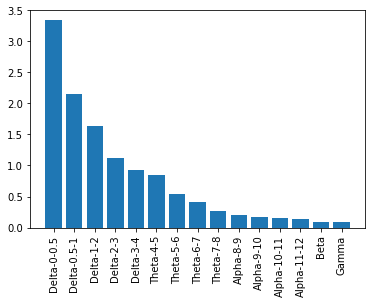

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.34155039 1.61463337 1.34222227 0.92548236 0.72492157 0.47962103
 0.39036499 0.32805505 0.25832854 0.20652617 0.19607937 0.17084384
 0.18769468 0.1534333  0.14430118]


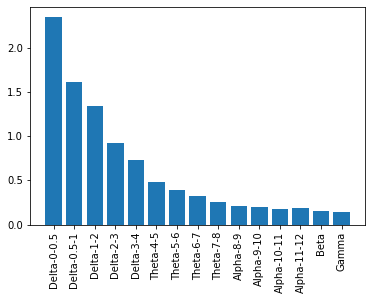

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.40640219 2.13679091 1.43210064 0.71992845 0.52246843 0.38660811
 0.26844232 0.22909642 0.21032251 0.27261499 0.22550562 0.15713427
 0.15496087 0.11298878 0.12509272]


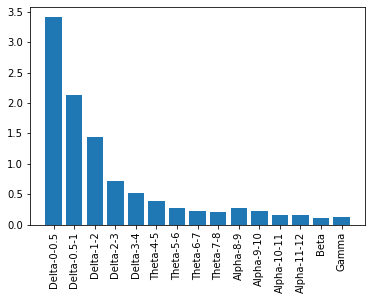

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.52951876 0.72542337 1.18627106 0.61742693 0.45176833 0.25718421
 0.2258657  0.27424509 0.24870138 0.32279311 0.21735579 0.10421689
 0.09184562 0.07786675 0.07038368]


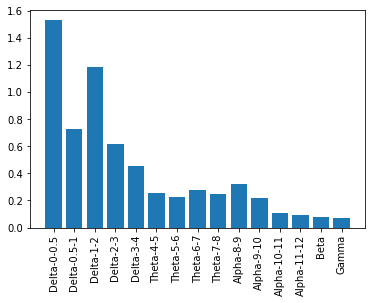

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[0.76269347 0.8657661  1.03929285 0.99517189 0.33214206 0.33399917
 0.25298919 0.3342104  0.52050808 0.26969171 0.19464459 0.11007268
 0.11946048 0.07313885 0.06630191]


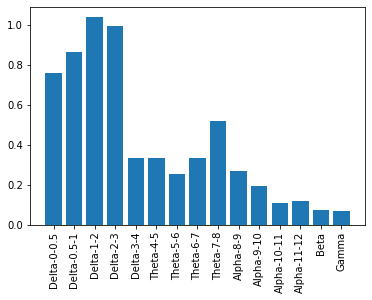

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.05172716 1.54750342 1.54192202 1.17500205 0.98328989 1.0110445
 0.50610788 0.36333207 0.32811757 0.25403519 0.18128581 0.14402526
 0.1397752  0.09422018 0.08007823]


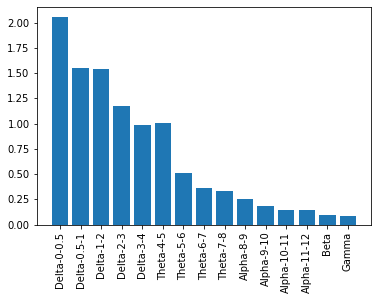

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.37367406 2.27177581 1.90986518 1.11645306 0.85808355 0.64032472
 0.48040152 0.4246694  0.25881975 0.25908529 0.2027327  0.20485716
 0.16342408 0.17818739 0.17784594]


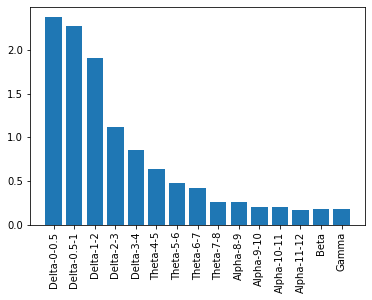

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.39027523 2.42366584 1.76105931 0.83454206 0.77702741 0.57545287
 0.45604439 0.30159203 0.23344082 0.15546534 0.14564524 0.11773901
 0.1160537  0.08346681 0.07694257]


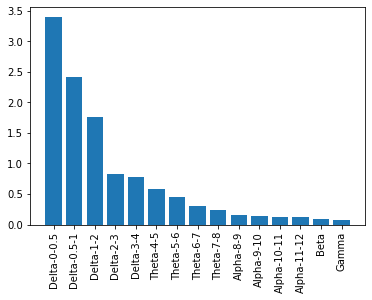

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.21982071 1.17630828 1.22297787 0.91346337 0.75963752 0.60734405
 0.43270253 0.36742226 0.26486523 0.19505464 0.14235127 0.15010474
 0.13388789 0.08660252 0.08166614]


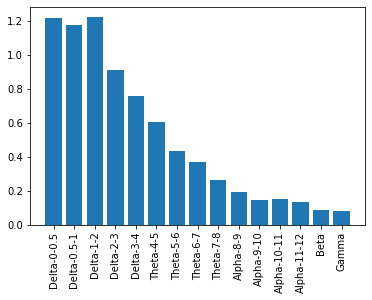

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.87089485 2.00006307 1.37462874 1.08425176 0.67842374 0.493807
 0.38288333 0.3085256  0.21576527 0.17651327 0.16827875 0.15218531
 0.13010583 0.12112343 0.12752261]


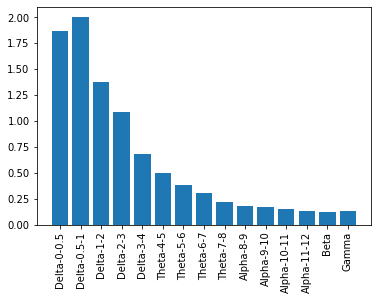

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.41599249 2.45712394 1.50453419 0.92300644 0.64265273 0.45893621
 0.35003603 0.29994159 0.22095463 0.16954378 0.2087639  0.1595511
 0.16249042 0.09501819 0.08867427]


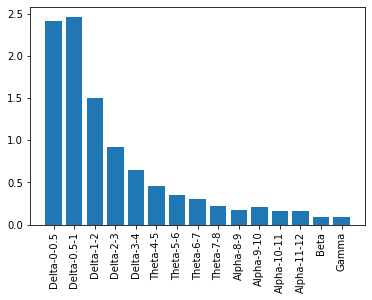

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.24256521 2.41664726 1.52215185 1.12242564 0.7836751  0.54748708
 0.36186853 0.36927816 0.2692459  0.1849223  0.18233524 0.14565681
 0.12655106 0.11094922 0.11026603]


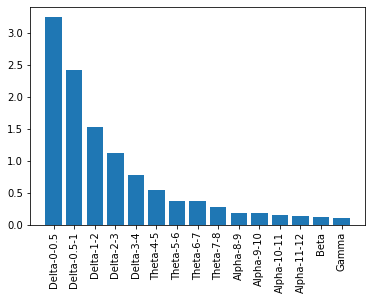

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.92690413 2.17668748 1.78330847 0.98071351 0.78018953 0.63453972
 0.47481775 0.39488694 0.28713065 0.24337779 0.18264999 0.137083
 0.12806259 0.10352048 0.10219117]


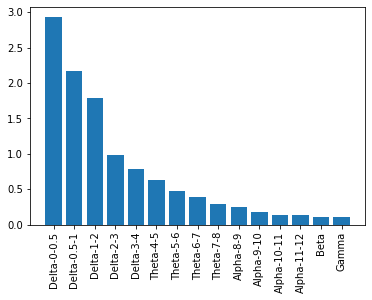

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.93105328 1.81180837 1.14718477 0.8534153  0.72904426 0.53770332
 0.40234914 0.29083105 0.25291814 0.17385588 0.14336161 0.1184045
 0.11513181 0.09480099 0.09745311]


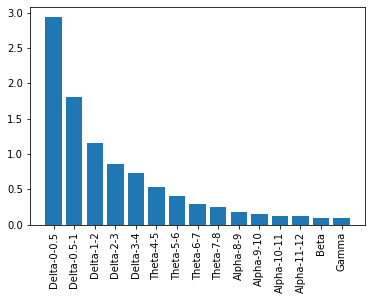

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.73913714 1.15538316 1.05887212 0.58505642 0.49015749 0.31066234
 0.27873164 0.20849383 0.14671244 0.10122029 0.0993356  0.08809683
 0.09985734 0.06974899 0.06490422]


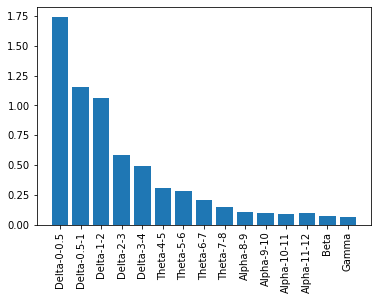

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.90596759 1.72768602 1.36999219 0.99506529 0.62040041 0.42355537
 0.38607671 0.23567712 0.24086648 0.1933807  0.18045344 0.14263623
 0.11286823 0.10032039 0.10512916]


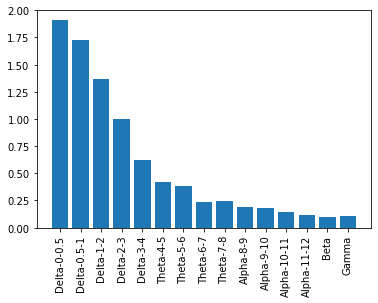

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.86049929 1.17949504 0.9053282  0.8136072  0.54071719 0.3943622
 0.30750251 0.27554205 0.19456815 0.15560456 0.14636371 0.140808
 0.1049423  0.09473551 0.09093609]


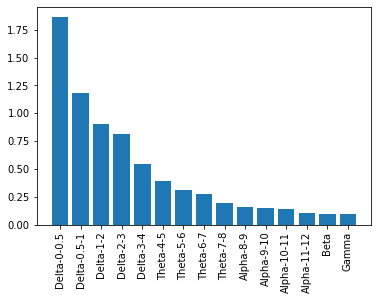

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.98497384 1.62783406 1.40509042 0.87873179 0.7683098  0.50943373
 0.33731984 0.34849566 0.24874572 0.21691438 0.17139874 0.15600024
 0.12420659 0.10677876 0.09861732]


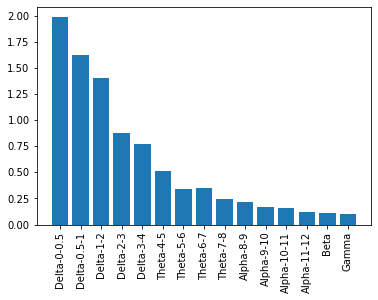

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.17556386 1.4205954  1.23227419 0.82837383 0.66120357 0.51090695
 0.29536515 0.30746293 0.25326695 0.1993522  0.13269666 0.12861682
 0.13850855 0.08920653 0.09314919]


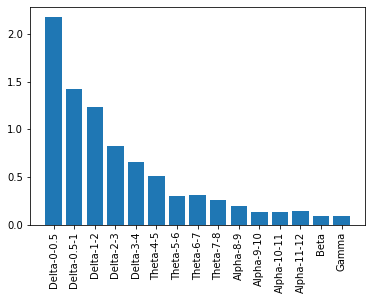

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.31115247 1.04097954 1.05511579 0.67386913 0.45649018 0.35307808
 0.32115258 0.2332247  0.20188561 0.1469351  0.16215134 0.13046747
 0.09831237 0.11261798 0.11283294]


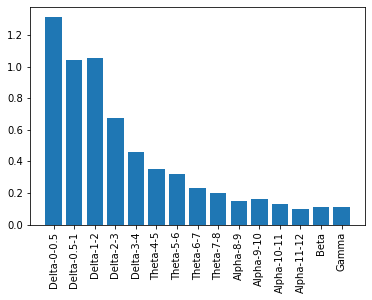

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.7188157  1.22691732 1.06506141 0.62564155 0.47084389 0.34457941
 0.23906019 0.18424401 0.18195869 0.14853783 0.12869517 0.12859175
 0.09144686 0.08503605 0.08248873]


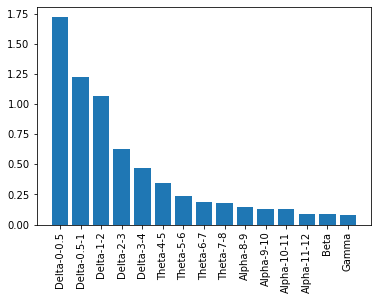

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.02355344 0.88440067 0.71048684 0.59410664 0.4440533  0.3204171
 0.24197787 0.24561544 0.16169167 0.14628983 0.12198332 0.12355602
 0.11614398 0.07550158 0.07241151]


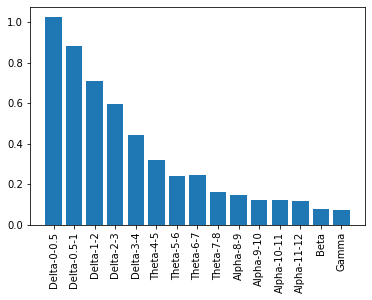

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.10240794 0.85950508 0.81902771 0.48939367 0.35561498 0.24826447
 0.20142558 0.17741139 0.16449256 0.15045627 0.10733074 0.13498179
 0.13709481 0.09727119 0.09630904]


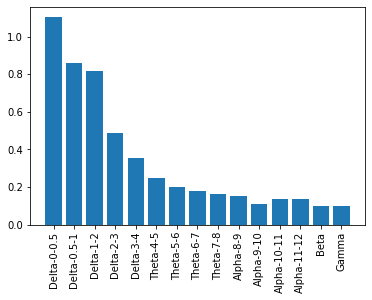

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.05243887 0.9160396  0.50966001 0.42455643 0.1830349  0.2531552
 0.2227051  0.17705543 0.16890369 0.1417394  0.1277092  0.11714011
 0.11115815 0.09071433 0.0869702 ]


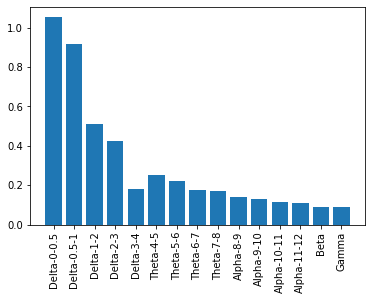

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.36650331 1.18863232 0.95711208 0.6795866  0.4479689  0.38061939
 0.2874027  0.20525023 0.18930893 0.1373576  0.11478568 0.09362456
 0.10255874 0.08227786 0.08362835]


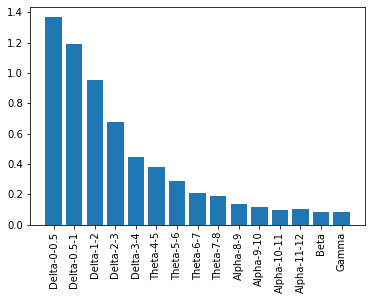

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.73081142 1.67796997 1.24177715 0.76814054 0.68764376 0.37126507
 0.28947233 0.2396564  0.15186451 0.19385286 0.14173742 0.1167582
 0.10730624 0.08960096 0.08608456]


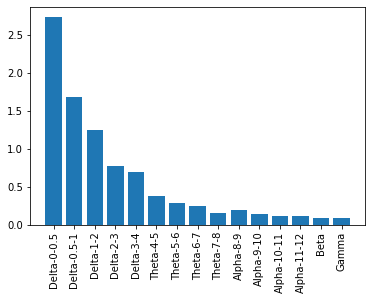

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.38117902 1.5337876  1.09603126 0.67280436 0.54972369 0.33490776
 0.30355897 0.23667987 0.22758517 0.13413429 0.15095136 0.13897517
 0.10558993 0.09767257 0.09230611]


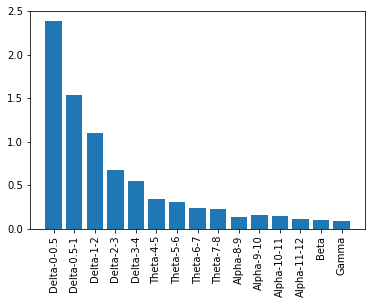

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.38560081 0.72445626 0.82478194 0.61005442 0.39462002 0.31300199
 0.25761951 0.2002507  0.14361694 0.14689523 0.13693443 0.111509
 0.12870132 0.09568096 0.10009647]


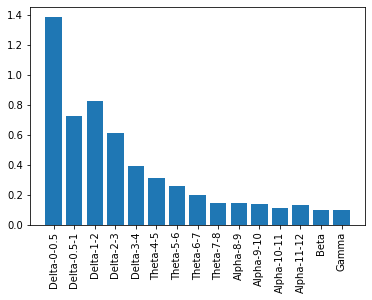

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.08587868 1.45435254 0.87838922 0.68917826 0.52123891 0.37040873
 0.24500392 0.29492314 0.17069527 0.19572063 0.12292645 0.13821515
 0.1115616  0.0933058  0.09675816]


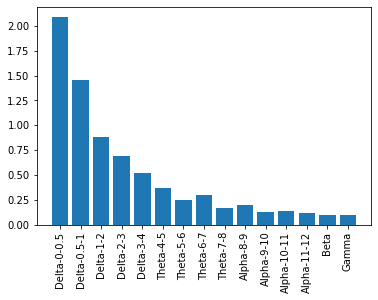

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.5707521  1.7293568  1.28748048 0.87366855 0.65272004 0.44714005
 0.33718471 0.26533102 0.19910245 0.13983955 0.14073196 0.15080415
 0.12139404 0.09519801 0.09869497]


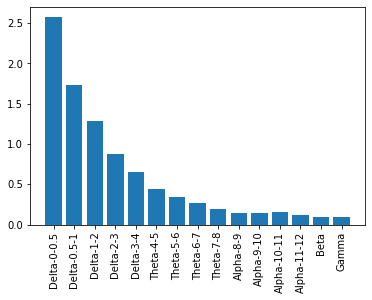

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.18416988 1.3577939  0.99225079 0.67576339 0.4280859  0.40251812
 0.26773833 0.22602316 0.2006011  0.16577279 0.13798207 0.10896362
 0.14128721 0.09775707 0.09406123]


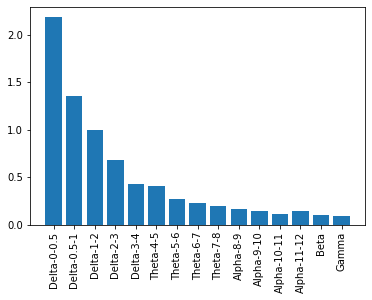

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[0.93453209 0.68407107 0.70955409 0.3736683  0.32581585 0.31910383
 0.30451093 0.26913424 0.18663951 0.18426166 0.12518104 0.11785778
 0.08566939 0.09312127 0.09295982]


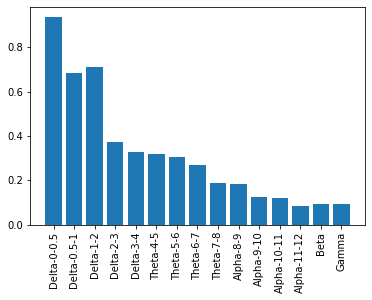

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.38610487 0.93433462 0.97713645 0.63534735 0.40923601 0.29920757
 0.212246   0.2234687  0.19385053 0.1447177  0.12351801 0.10799333
 0.10717202 0.08775458 0.08897216]


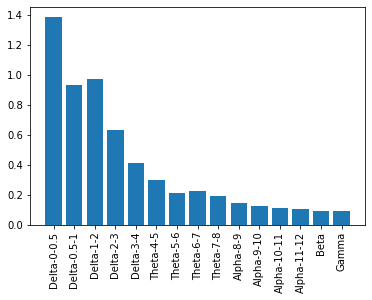

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.72032854 0.94156909 0.80845056 0.6174239  0.41682398 0.31011251
 0.26379122 0.20746165 0.1688105  0.15398619 0.1407512  0.12804715
 0.1086889  0.09370481 0.09357626]


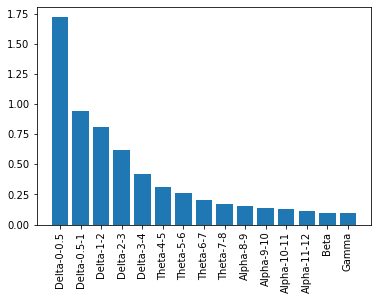

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.46360366 1.13758178 0.83302871 0.57584132 0.39486838 0.31237387
 0.28809838 0.20670581 0.19950385 0.16214722 0.12942771 0.12382069
 0.09245488 0.07809513 0.08549587]


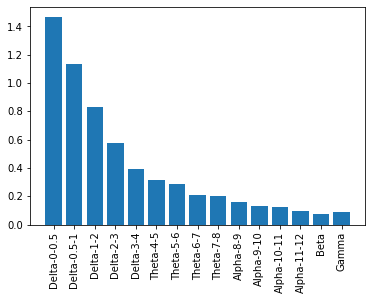

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.24162048 1.81449867 1.21941688 0.84911514 0.48740187 0.42860059
 0.31712575 0.25666607 0.20977308 0.15519517 0.16636249 0.1302495
 0.135339   0.09058518 0.09225923]


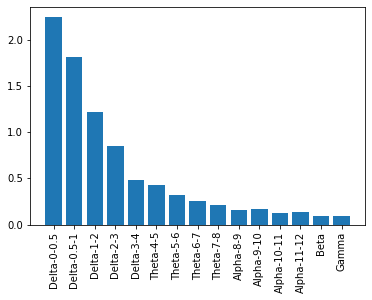

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.99429624 1.71930734 1.09133681 0.70854255 0.42881014 0.31396741
 0.25411902 0.25134496 0.18942015 0.16453441 0.14360491 0.13759665
 0.12194057 0.10702594 0.11169882]


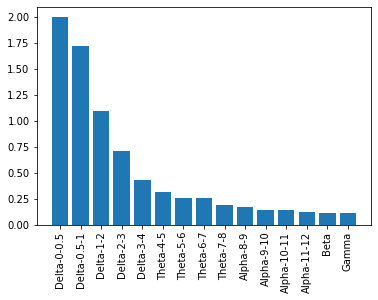

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.57767459 1.48089898 1.11356359 0.6210492  0.42198833 0.41516435
 0.26023081 0.22147296 0.18461232 0.16595949 0.1392843  0.13810246
 0.10560075 0.08541142 0.08752005]


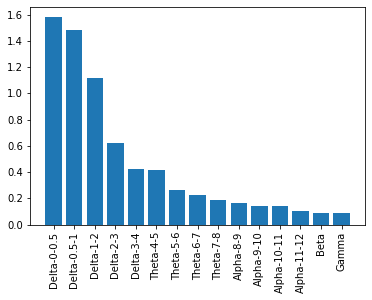

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.11553206 0.74379396 0.65782822 0.43343624 0.30788466 0.31053594
 0.27220592 0.23817973 0.15076794 0.13578438 0.13018045 0.1080993
 0.12330061 0.09994017 0.09269966]


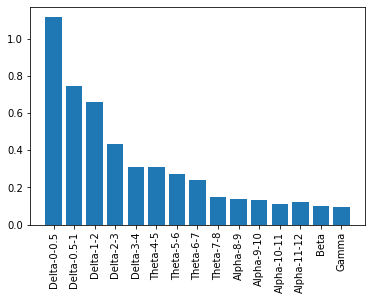

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.58398098 1.42367365 0.87114933 0.63594448 0.45486789 0.37190797
 0.29709227 0.25943539 0.15296439 0.14921627 0.10815704 0.13904501
 0.10968716 0.0955026  0.0934153 ]


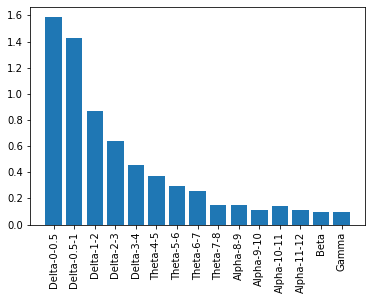

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.63314566 1.85094905 1.14682093 0.85894774 0.55037299 0.3359948
 0.37243089 0.27680418 0.20706338 0.19149525 0.17754289 0.13016216
 0.11253357 0.09632924 0.09408863]


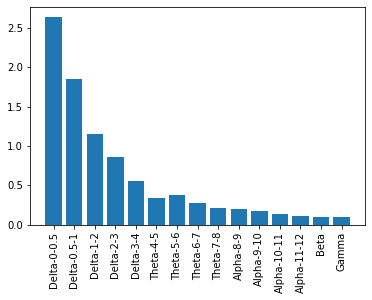

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.01822425 1.60326071 1.0875499  0.8084534  0.49399715 0.32063027
 0.25993647 0.23668048 0.19520013 0.18033731 0.12487881 0.11630972
 0.10835389 0.08214975 0.07984486]


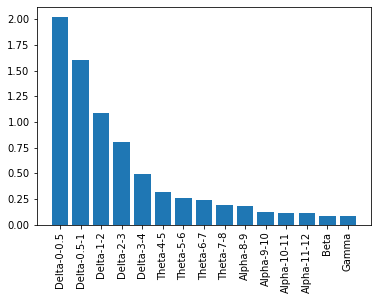

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.9840091  2.18890664 1.32460958 0.75677386 0.51264042 0.39866735
 0.31849425 0.28491438 0.17178086 0.16208773 0.14336388 0.11553833
 0.11668778 0.09267536 0.09057668]


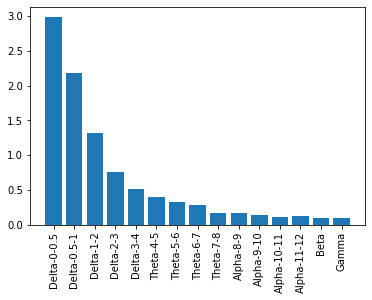

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.78088362 1.3202466  1.09182522 0.7014142  0.52620757 0.36110298
 0.34808552 0.22626687 0.19325293 0.14647951 0.15332837 0.1390367
 0.10072435 0.10263233 0.10600105]


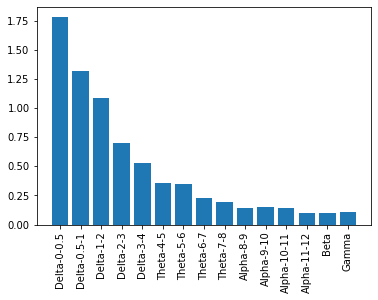

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.81740092 1.13091027 0.66699823 0.48783042 0.26766844 0.24483214
 0.18692715 0.17257601 0.11843929 0.14609922 0.13030271 0.09136835
 0.0806919  0.07241456 0.07226381]


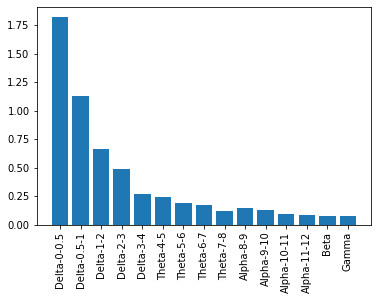

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.77956513 1.10333027 0.98141117 0.67772587 0.44274117 0.44745482
 0.31267476 0.22693704 0.21991135 0.18704836 0.14024388 0.14052074
 0.11780604 0.10841657 0.11323467]


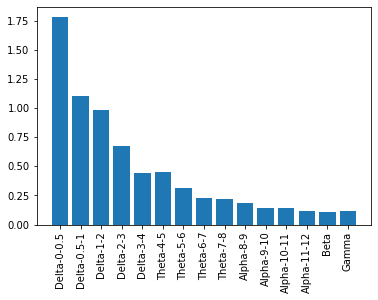

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.61092885 1.13621365 0.73639188 0.44747889 0.35986778 0.31108387
 0.23202316 0.24705503 0.18299238 0.18083395 0.14703094 0.12014893
 0.12107802 0.09732482 0.09818099]


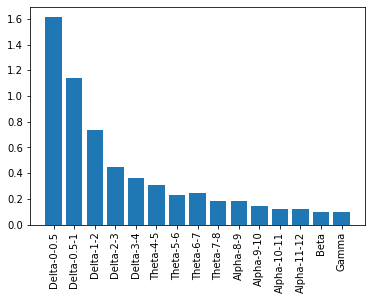

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.92930668 0.88128613 0.99649271 0.62445102 0.52513799 0.36455343
 0.26781509 0.19049315 0.17756799 0.15214829 0.12402855 0.13344555
 0.13627953 0.10359718 0.10090401]


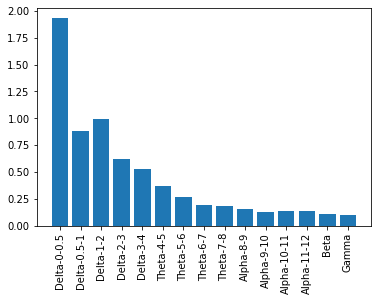

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.37819206 1.90273683 1.15209402 0.85336802 0.48692075 0.36784091
 0.30223554 0.25713408 0.20923397 0.18448256 0.13667192 0.14229459
 0.1414129  0.10036945 0.09635505]


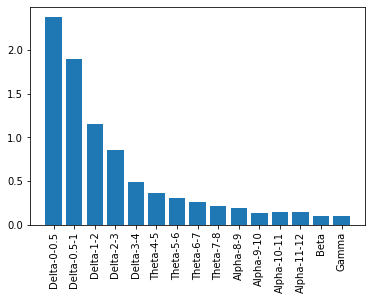

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.54867346 1.58657273 0.86324501 0.70319089 0.44436163 0.31916273
 0.26412379 0.24733652 0.20326257 0.13896023 0.13712157 0.12959522
 0.11574539 0.08095296 0.08160099]


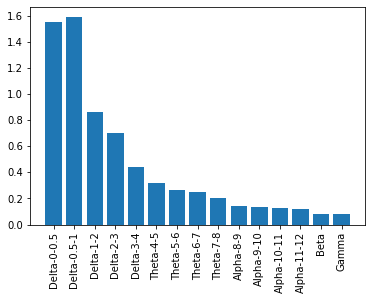

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.76531625 1.03519477 0.80659075 0.54599996 0.3942253  0.37378685
 0.25647229 0.21947634 0.20436633 0.15040241 0.11663885 0.11692253
 0.09435137 0.08156739 0.07728655]


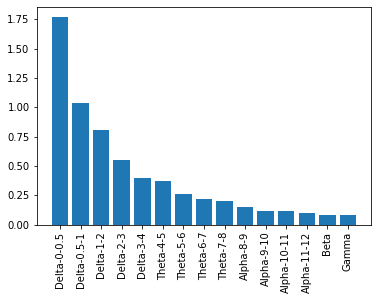

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.50421938 1.01899108 1.24931223 0.72177398 0.54682548 0.30184923
 0.22950676 0.20374253 0.18001434 0.15369129 0.12364639 0.12573804
 0.104135   0.08681258 0.08653379]


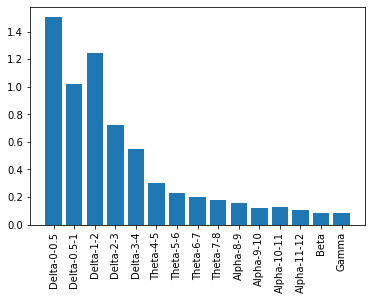

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.18692413 1.15427544 0.8449517  0.4948468  0.45709593 0.32267274
 0.27061941 0.26157484 0.15840696 0.16362627 0.15327478 0.12018714
 0.12214726 0.09455231 0.09904696]


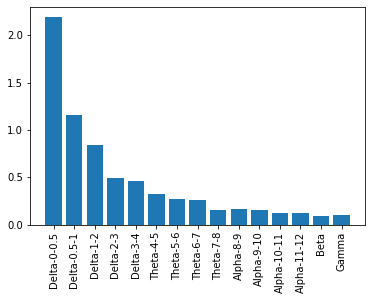

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.60433012 1.26802094 1.10737924 0.83459948 0.51529786 0.34460252
 0.28614633 0.21470473 0.20793831 0.18338115 0.12818493 0.11453272
 0.13665308 0.10652972 0.10834237]


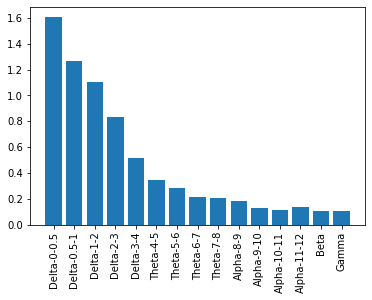

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.27238264 0.94607129 1.11029783 0.61819547 0.41684357 0.33947976
 0.33278456 0.2510794  0.28569513 0.15068531 0.11822577 0.1364937
 0.12670838 0.1083796  0.11402053]


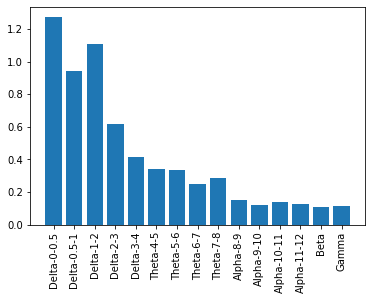

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.09146934 1.53581722 1.13952026 0.86045331 0.56635203 0.35643513
 0.32373327 0.28265167 0.21023188 0.16451106 0.14439937 0.14503126
 0.13029982 0.10497295 0.10444279]


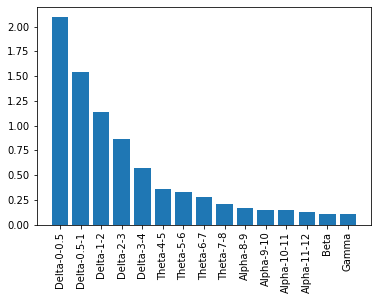

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.38759796 1.08871248 0.85623281 0.65773391 0.43428008 0.36958238
 0.28255967 0.20678476 0.23635463 0.15263865 0.14498218 0.14753668
 0.11151643 0.11439458 0.12896962]


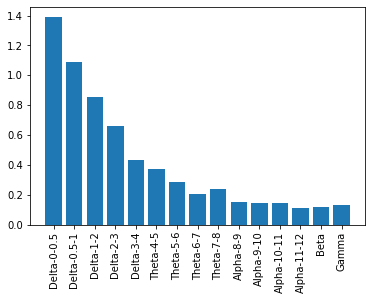

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[0.64037179 0.5536835  0.53887146 0.47802769 0.28375456 0.30401518
 0.38532143 0.36056961 0.34066835 0.18928516 0.11401671 0.09204287
 0.11581798 0.10064564 0.10277637]


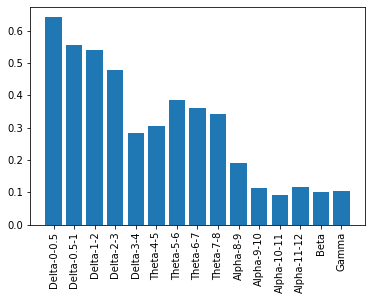

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[0.45294822 0.41931541 0.48886668 0.3246683  0.26705356 0.22104376
 0.23812579 0.27907947 0.27564452 0.17389627 0.11343053 0.08753377
 0.08996585 0.08182274 0.08538083]


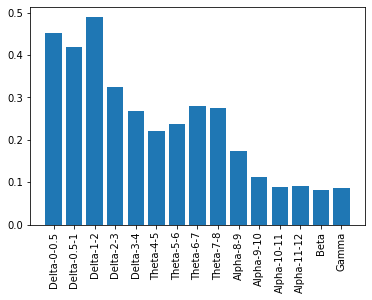

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.08738238 1.28757884 0.84787227 0.6660507  0.44898021 0.32177379
 0.25619906 0.25375453 0.17335259 0.17518292 0.13579616 0.11956794
 0.09142851 0.08981645 0.09561167]


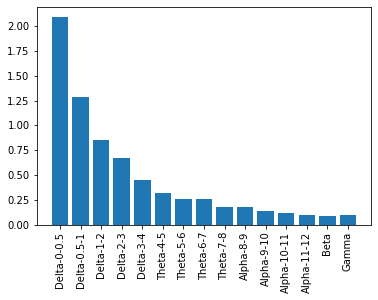

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.57700543 1.22935456 0.77497778 0.69639036 0.554737   0.35337265
 0.23502729 0.25287685 0.16148409 0.16237952 0.14765823 0.12436768
 0.12247231 0.09022726 0.08981182]


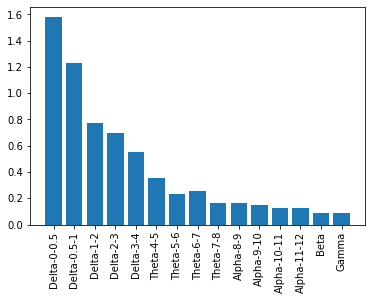

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.8070217  1.05298745 1.00684095 0.63391891 0.4122968  0.37627958
 0.28358607 0.2544575  0.20929891 0.15141171 0.10314741 0.12991331
 0.11154686 0.08461645 0.08770255]


KeyboardInterrupt: 

In [112]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'D:/dataset/data_2013/origin_npy/Fpz-Cz/'

signals_npy_list = search_signals_npy(path)

for filename in signals_npy_list:
    signals = np.load(path+filename)
    length = len(signals[0])//fs//epoch_size
    print(signals.shape)
    for index in range(length):
        data = signals[0,int(index*fs*30) : int((index+1)*fs*30)]
        # Get real amplitudes of FFT (only in postive frequencies)
        fft_vals = np.absolute(np.fft.rfft(data)) / (fs*epoch_size)# real fft 계산 

        
        #         fft_vals[:1*30+1] = 0
        #         fft_vals[35*30:] = 0
        
        # Get frequencies for amplitudes in Hz
        fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

        # Define EEG bands
        eeg_bands = {'Delta-0-0.5': (0, 0.5),
                     'Delta-0.5-1': (0.5, 1),
                     'Delta-1-2': (1, 2),
                     'Delta-2-3': (2, 3),
                     'Delta-3-4': (3, 4),
                     'Theta-4-5': (4, 5),
                     'Theta-5-6': (5, 6),
                     'Theta-6-7': (6, 7),
                     'Theta-7-8': (7, 8),
                     'Alpha-8-9': (8, 9),
                     'Alpha-9-10': (9, 10),
                     'Alpha-10-11': (10, 11),
                     'Alpha-11-12': (11, 12),
                     'Beta': (12, 30),
                     'Gamma': (30, 45)}

        # Take the mean of the fft amplitude for each EEG band
        eeg_band_fft = []
        for band in eeg_bands:  
            #print('band : ',band)
            freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                               (fft_freq <= eeg_bands[band][1]))[0]
            
            eeg_band_fft.append(np.mean(fft_vals[freq_ix]))
        eeg_band_fft = np.array(eeg_band_fft)
        # Plot the data (using pandas here cause it's easy)

        print(eeg_bands.keys())
        print(eeg_band_fft)
        plt.bar(eeg_bands.keys(),eeg_band_fft)
        plt.xticks(rotation=90)
        plt.show()



#### Frequency 대역 정보 확인

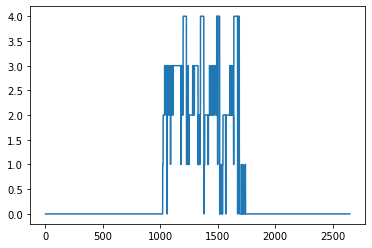

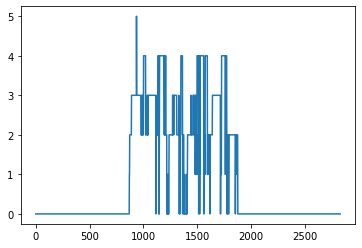

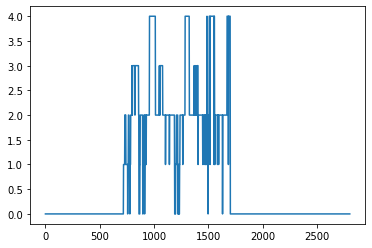

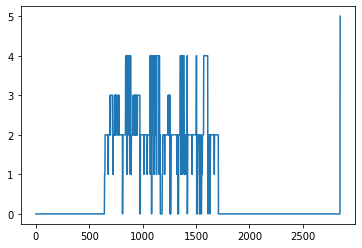

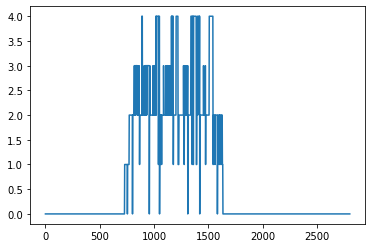

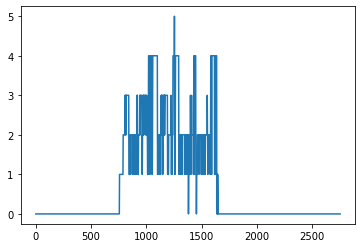

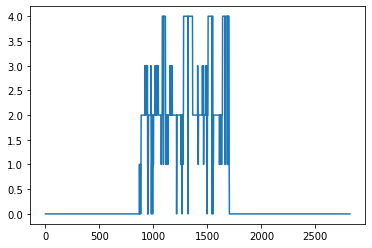

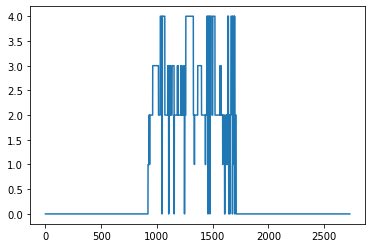

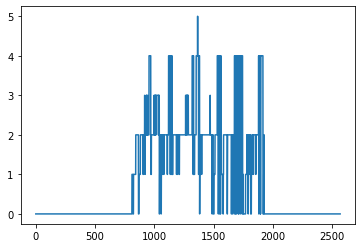

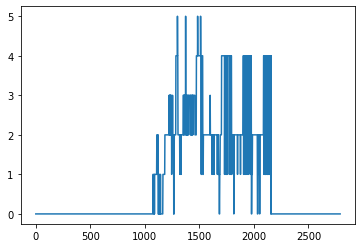

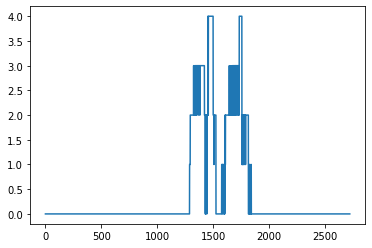

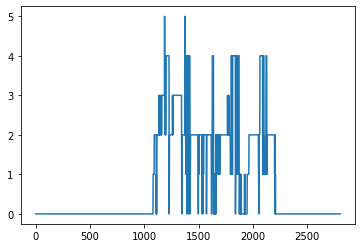

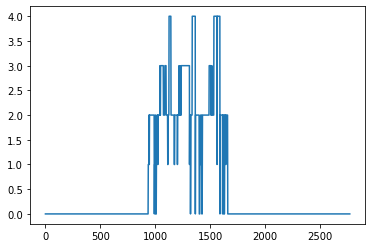

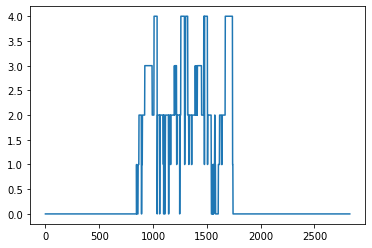

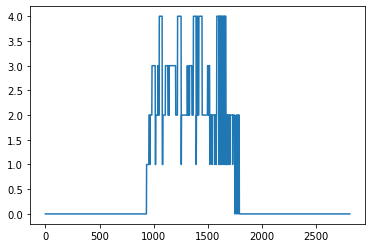

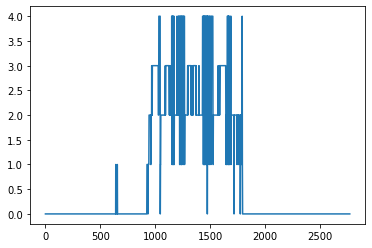

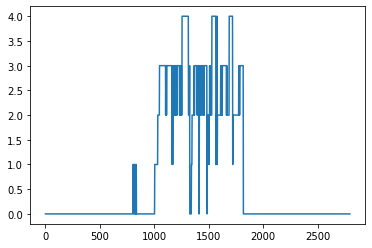

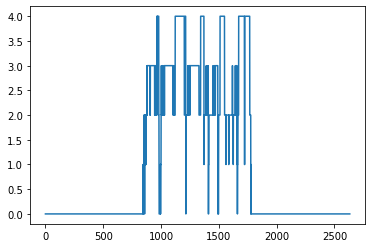

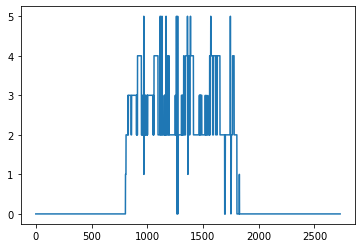

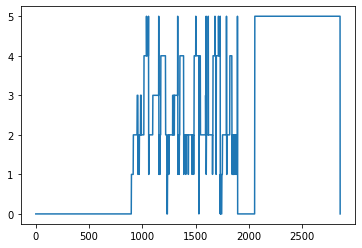

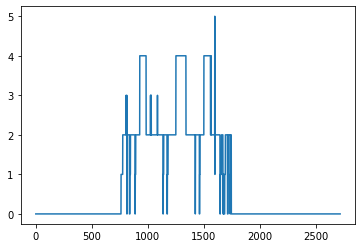

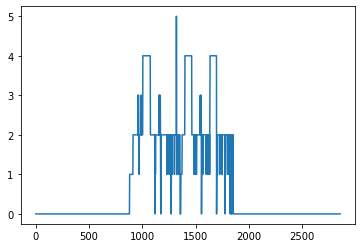

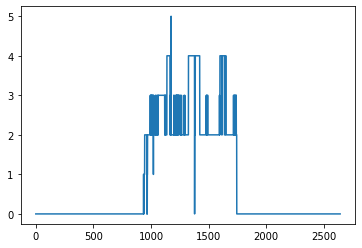

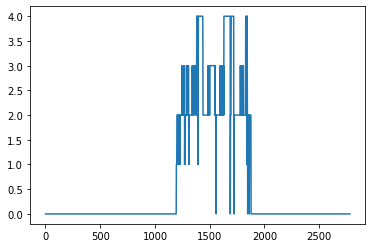

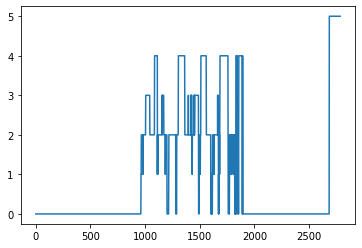

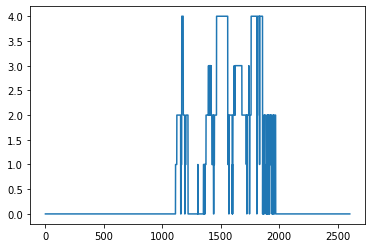

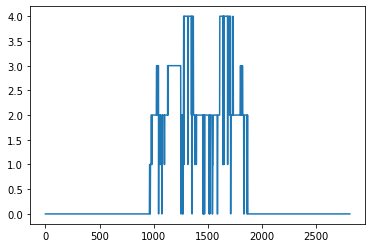

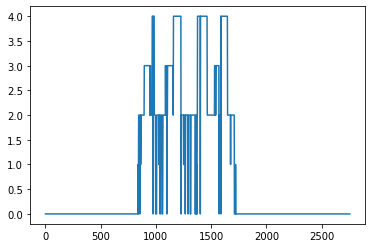

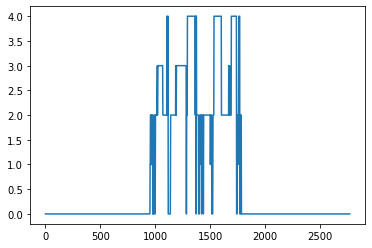

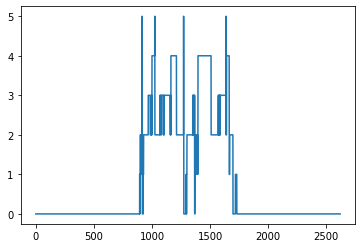

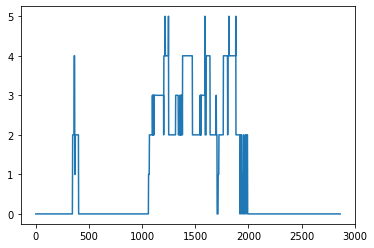

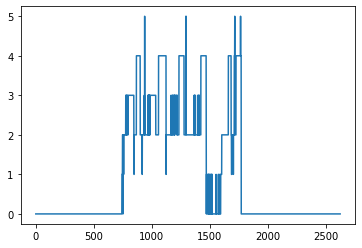

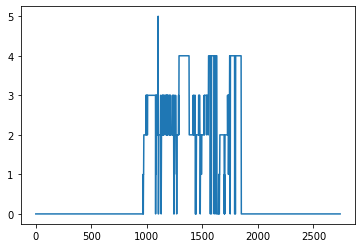

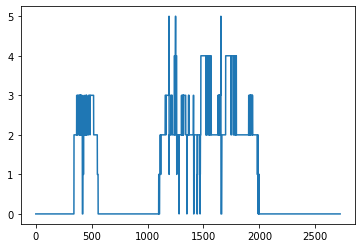

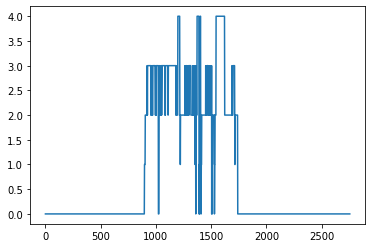

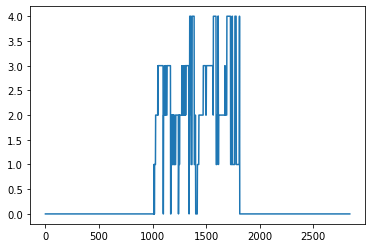

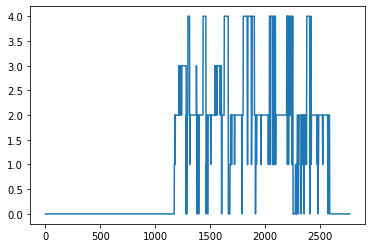

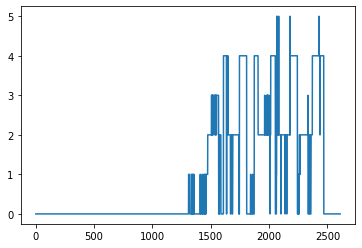

In [156]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'D:/dataset/data_2013/origin_npy/annotations/'

annotations_npy_list = search_signals_npy(path)

check_index_size = 10

for filename in annotations_npy_list:
    label_info = np.zeros([5],dtype=int)
    label = np.load(path + filename)
    
    

    plt.plot(label)
    plt.show()
    print('='*20)



#### label 구성 확인

In [196]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'D:/dataset/data_2013/origin_npy/annotations/'
signals_path = 'D:/dataset/data_2013/origin_npy/Fpz-Cz/'

save_annotations_path = path + 'remove_wake/'
save_signals_path = signals_path + 'remove_wake/'

os.makedirs(save_annotations_path,exist_ok=True)
os.makedirs(save_signals_path,exist_ok=True)
annotations_npy_list = search_signals_npy(path)

check_index_size = 10

total_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list:
    label = np.load(path + filename)
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    
    signals = np.load(signals_path+signals_filename)
    
    for remove_start_index in range(0,len(label),1):
        #print(np.bincount(label[remove_start_index:(remove_start_index+check_index_size)],minlength=6)[0])
        if(np.bincount(label[remove_start_index:(remove_start_index+check_index_size)],minlength=6)[0] != check_index_size):
            break
            
    for remove_end_index in range(len(label),-1,-1,):
        #print(np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[0])
        if(np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[0] != check_index_size and np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[5] == 0 ):
            break
    
    #print('remove start index : %d / remove end index : %d'%(remove_start_index,remove_end_index))
    label = label[remove_start_index:remove_end_index+1]
    signals = signals[0,remove_start_index*fs*epoch_size:(remove_end_index+1)*fs*epoch_size].reshape(1,-1)
    #print(np.bincount(label,minlength=6))
    if len(label) ==len(signals[0])//30//fs:
        np.save(save_annotations_path+filename.split('.')[0],label)
        np.save(save_signals_path+signals_filename.split('.')[0],signals)
    for i in range(6):
        total_label[i] += np.bincount(label,minlength=6)[i]
    
    
print(total_label)


[ 4258  2762 17340  5575  7522    59]


#### Wake 수 줄이는 작업

[ 4258  2762 17340  5575  7522    59]


<BarContainer object of 6 artists>

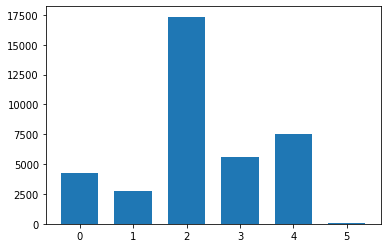

In [213]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'D:/dataset/data_2013/origin_npy/annotations/remove_wake/'
signals_path = 'D:/dataset/data_2013/origin_npy/Fpz-Cz/remove_wake/'

annotations_npy_list = search_signals_npy(path)

total_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list:
    label = np.load(path + filename)
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    
    signals = np.load(signals_path+signals_filename)
    
    
    #print('remove start index : %d / remove end index : %d'%(remove_start_index,remove_end_index))
    #print(np.bincount(label,minlength=6))
    if len(label) !=len(signals[0])//30//fs:
        print('file is fault!!!')
    for i in range(6):
        total_label[i] += np.bincount(label,minlength=6)[i]
        
print(total_label)

x = np.arange(len(total_label))

plt.bar(x,total_label,width=0.7)

In [217]:
print(len(annotations_npy_list))

38


#### 최종 데이터셋 형태

In [240]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'D:/dataset/data_2013/origin_npy/annotations/remove_wake/'
signals_path = 'D:/dataset/data_2013/origin_npy/Fpz-Cz/remove_wake/'

annotations_npy_list = search_signals_npy(path)

print(annotations_npy_list)

random.shuffle(annotations_npy_list)

print(annotations_npy_list)

trainDataset_count = 30
testDataset_count = len(annotations_npy_list)-trainDataset_count

train_label = np.zeros([6],dtype=int)
test_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list[:trainDataset_count]:
    label = np.load(path + filename)
    
    for i in range(6):
        train_label[i] += np.bincount(label,minlength=6)[i]

        
for filename in annotations_npy_list[trainDataset_count:]:
    label = np.load(path + filename)
    
    for i in range(6):
        test_label[i] += np.bincount(label,minlength=6)[i]
        
train_label = train_label / np.sum(train_label) * 100
test_label = test_label / np.sum(test_label) * 100
print(train_label)
print(test_label)

['SC4001EC-Hypnogram.npy', 'SC4002EC-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4012EC-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4022EJ-Hypnogram.npy', 'SC4031EC-Hypnogram.npy', 'SC4032EP-Hypnogram.npy', 'SC4041EC-Hypnogram.npy', 'SC4042EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4061EC-Hypnogram.npy', 'SC4062EC-Hypnogram.npy', 'SC4071EC-Hypnogram.npy', 'SC4072EH-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4082EP-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4101EC-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4111EC-Hypnogram.npy', 'SC4112EC-Hypnogram.npy', 'SC4121EC-Hypnogram.npy', 'SC4122EV-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4141EU-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4151EC-Hypnogram.npy', 'SC4152EC-Hypnogram.npy', 'SC4161EC-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4181EC-Hypnogram.npy', 'SC4182EC-Hypnogram.npy', 'SC4191EP-Hypnogram.npy', 'SC4192EV-Hypnogram.npy']
['SC4071EC-

In [246]:
path =  'D:/dataset/data_2013/origin_npy/annotations/remove_wake/'
signals_path = 'D:/dataset/data_2013/origin_npy/Fpz-Cz/remove_wake/'

save_train_path = 'D:/dataset/data_2013/origin_npy/Fpz-Cz/remove_wake/train/'
save_test_path = 'D:/dataset/data_2013/origin_npy/Fpz-Cz/remove_wake/test/'

os.makedirs(save_train_path,exist_ok=True)
os.makedirs(save_test_path,exist_ok=True)

for filename in annotations_npy_list[:trainDataset_count]:
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    shutil.copy(signals_path+signals_filename,save_train_path+filename)
    

        
for filename in annotations_npy_list[trainDataset_count:]:
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    shutil.copy(signals_path+signals_filename,save_test_path+filename)

In [255]:

train_path =  'D:/dataset/data_2013/origin_npy/Fpz-Cz/remove_wake/train/'
test_path = 'D:/dataset/data_2013/origin_npy/Fpz-Cz/remove_wake/test/'
annotations_path = 'D:/dataset/data_2013/origin_npy/annotations/remove_wake/'

train_list = search_signals_npy(train_path)
test_list = search_signals_npy(test_path)

print(train_list)
print(test_list)

train_label = np.zeros([6],dtype=int)
test_label = np.zeros([6],dtype=int)

for filename in train_list:
    filename = search_correct_annotations_npy(annotations_path,filename)[0]
    label = np.load(annotations_path + filename)
    
    for i in range(6):
        train_label[i] += np.bincount(label,minlength=6)[i]

        
for filename in test_list:
    filename = search_correct_annotations_npy(annotations_path,filename)[0]
    label = np.load(annotations_path + filename)
    
    for i in range(6):
        test_label[i] += np.bincount(label,minlength=6)[i]
        
train_label = train_label / np.sum(train_label) * 100
test_label = test_label / np.sum(test_label) * 100
print(train_label)
print(test_label)

['SC4001EC-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4012EC-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4032EP-Hypnogram.npy', 'SC4041EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4061EC-Hypnogram.npy', 'SC4062EC-Hypnogram.npy', 'SC4071EC-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4082EP-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4111EC-Hypnogram.npy', 'SC4112EC-Hypnogram.npy', 'SC4121EC-Hypnogram.npy', 'SC4122EV-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4152EC-Hypnogram.npy', 'SC4161EC-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4181EC-Hypnogram.npy', 'SC4191EP-Hypnogram.npy']
['SC4002EC-Hypnogram.npy', 'SC4022EJ-Hypnogram.npy', 'SC4031EC-Hypnogram.npy', 'SC4042EC-Hypnogram.npy', 'SC4072EH-Hypnogram.npy', 'SC4101EC-Hypnogram.npy', 'SC4141EU-Hypnogram.npy', 'SC4151EC-Hypnogram.npy', 'SC4182EC-Hypnogram.npy', 'SC4192EV-Hypnogram.npy']
[11.521935